<a href="https://colab.research.google.com/github/GalynaDe/ML/blob/main/HW_2_1_%D0%9F%D0%BE%D0%B1%D1%83%D0%B4%D0%BE%D0%B2%D0%B0_%D0%BB%D1%96%D0%BD%D1%96%D0%B9%D0%BD%D0%BE%D1%97_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%97_%D0%B7%D0%B0_%D0%BE%D0%B4%D0%BD%D0%BE%D1%8E_%D0%BE%D0%B7%D0%BD%D0%B0%D0%BA%D0%BE%D1%8E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні кожне завдання оцінюється по 10 балів.

 **Завдання 1.** Після перегляду лекцій про поняття функії, вступ до лінійної алгебри і мат. формулювання лін. регресії знайдіть найкращу лінію для прогнозу `charges` за `age` **для некурців** (датафрейм `non_smoker_df`) з допомогою

1. Методу МНК (з використанням тільки `numpy`, без `scikit learn`)

2. Full-Batch градієнтного спуску з `numpy` . Протестуйте 3 різних learning rate і зробіть висновок, який є найкращим виходячи з практик для цього, наведених в лекції. Зверніть увагу, що на вхід треба набір даних дворозміний, для цього можливо треба буде трансформувати Ваші дані X в формат, як був в лекції "Математичне формулювання лінійної регресії". Також, градієнтний спуск в нашому випадку може розходитись з навчальним рейтом 0.1, бо цей рейт в цій задачі завеликий. Спробуйте нижчі рейти.
3. З `scikit-learn.LinearRegression`. Тут зверніть увагу, що вхід `X` має бути двовимірним масивом, тому нам потрібно передати dataframe, а не окрему колонку. Якщо у Вас X - колонка (а у Вас так мало б бути), то можна скористатись `X.to_frame()` щоб конвертувати колонку в датафрейм.

Для кожного методу
- знайдіть і виведіть коефіцієнти моделі
- обчисліть прогнози моделі і збережіть в окрему змінну
- порахуйте точність прогнозу RMSE  

Для градієнтного спуску виведіть графік помилки в залежності від ітерації.

А також побудуйте на одному графіку дані `age` проти `charges` в вигляді діаграми розсіювання і всі три лінії регресії, знайдені кожним з методів (для град. спуску оберіть варіант з тим learning rate, який виявився найкращим).

Зробіть висновки, чи відрізняються результати моделей?
Чи є знайдены параметри моделы близькими до ваших найкращих припущень?

In [13]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**1.**

Intercept: -2091.4205565650805
Coefficient: 267.24891283119985
RMSE: 4662.505766636395


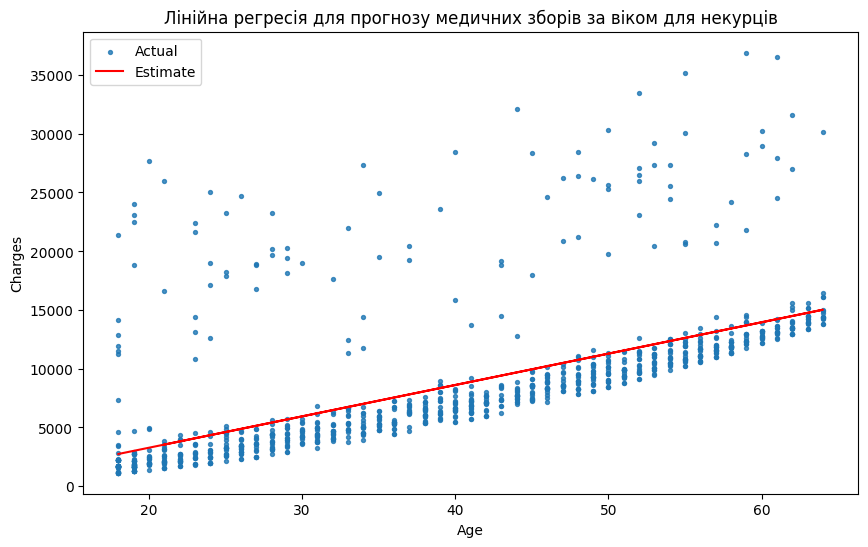

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных
medical_df = pd.read_csv("drive/MyDrive/ML course 2024/HW 2.1/medical-charges.csv")
non_smoker_df = medical_df[medical_df.smoker == 'no']

ages = non_smoker_df['age'].values
charges = non_smoker_df['charges'].values

X = np.column_stack((np.ones_like(ages), ages))
theta = np.linalg.pinv(X).dot(charges)

print(f"Intercept: {theta[0]}")
print(f"Coefficient: {theta[1]}")

predictions = X.dot(theta)

rmse = np.sqrt(np.mean((charges - predictions)**2))
print(f"RMSE: {rmse}")
plt.figure(figsize=(10, 6))
plt.scatter(ages, charges, s=8, alpha=0.8, label='Actual')
plt.plot(ages, predictions, 'r', label='Estimate')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.title('Лінійна регресія для прогнозу медичних зборів за віком для некурців')
plt.show()

**2.**

Learning rate: 0.1, RMSE: 4662.505766636395


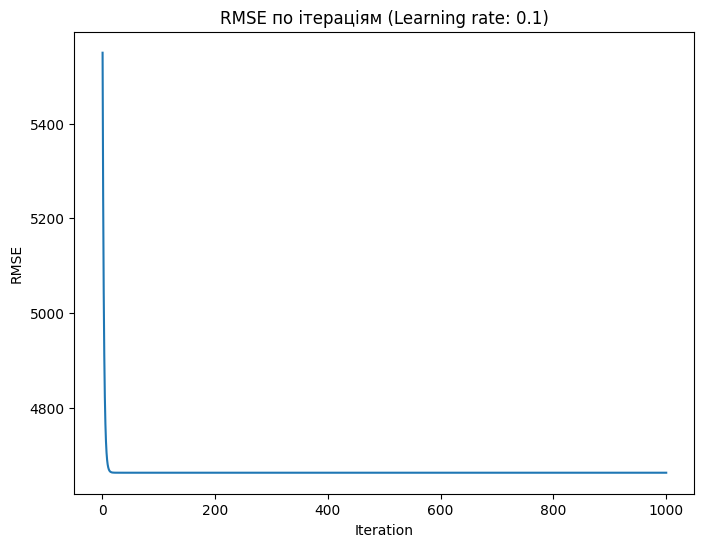

Learning rate: 0.01, RMSE: 4662.505766636395


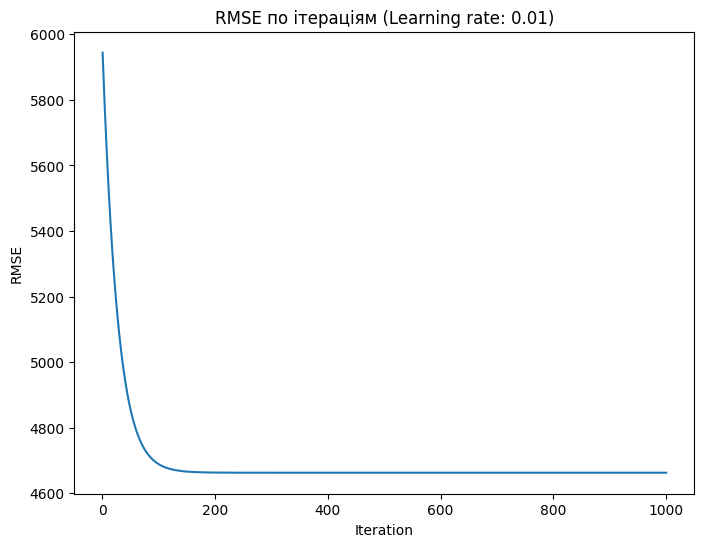

Learning rate: 0.001, RMSE: 4690.110821935184


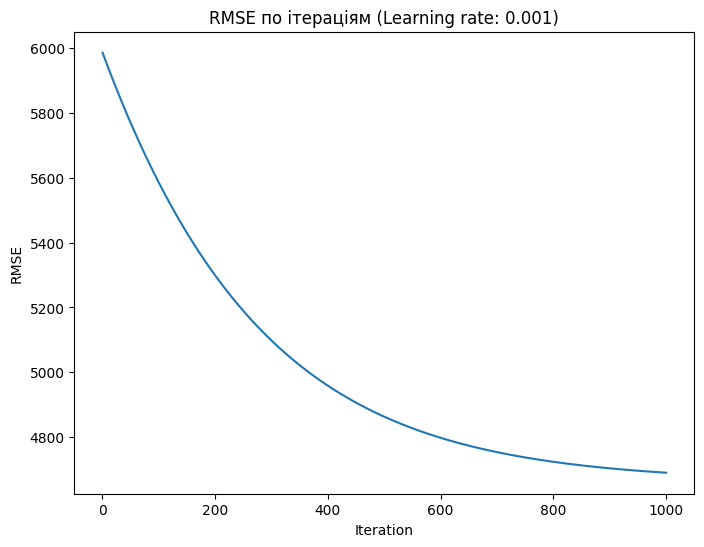

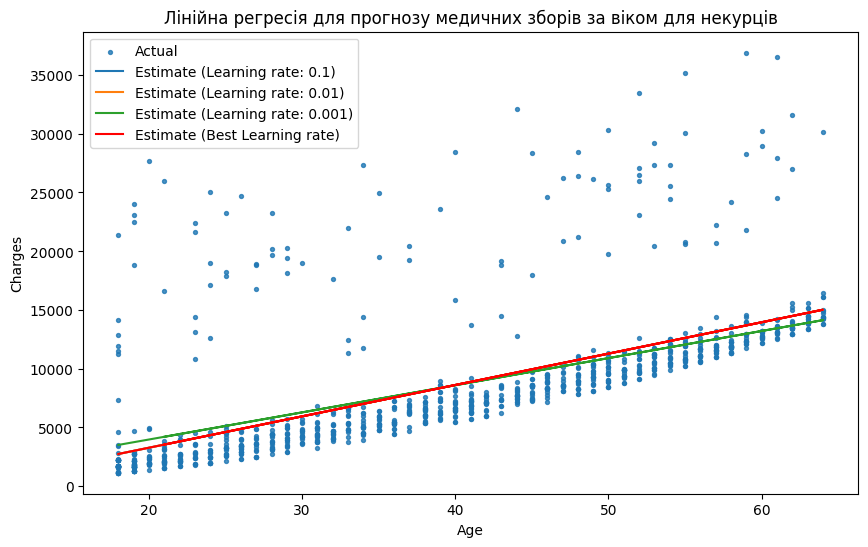

In [30]:
X = (ages - ages.mean()) / ages.std()
y = (charges - charges.mean()) / charges.std()
X = np.column_stack([np.ones(len(X)), X])
def rmse(targets, predictions):
    return np.sqrt(np.mean((targets - predictions)**2))
def adaptive_gradient_descent(X, y, learning_rate, epochs):
    m, n = X.shape
    theta = np.zeros(n)
    rmse_history = []
    for epoch in range(epochs):
        gradients = (2/m) * X.T.dot(X.dot(theta) - y)
        theta_new = theta - learning_rate * gradients
        if np.all(np.isfinite(theta_new)):
            theta = theta_new
            predictions = (X.dot(theta) * charges.std()) + charges.mean()
            rmse_history.append(rmse(charges, predictions))
        else:
            learning_rate *= 0.5
    return theta, rmse_history

learning_rates = [0.1, 0.01, 0.001]
epochs = 1000
for lr in learning_rates:
    theta, rmse_history = adaptive_gradient_descent(X, y, lr, epochs)
    predictions = (X.dot(theta) * charges.std()) + charges.mean()
    error = rmse(charges, predictions)
    print(f"Learning rate: {lr}, RMSE: {error}")
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(rmse_history) + 1), rmse_history)
    plt.xlabel('Iteration')
    plt.ylabel('RMSE')
    plt.title(f'RMSE по ітераціям (Learning rate: {lr})')
    plt.show()

best_lr = learning_rates[np.argmin([rmse((X.dot(adaptive_gradient_descent(X, y, lr, epochs)[0]) * charges.std()) + charges.mean(), charges) for lr in learning_rates])]
best_theta, _ = adaptive_gradient_descent(X, y, best_lr, epochs)

plt.figure(figsize=(10, 6))
plt.scatter(ages, charges, s=8, alpha=0.8, label='Actual')

for lr in learning_rates:
    theta, _ = adaptive_gradient_descent(X, y, lr, epochs)
    predictions = (X.dot(theta) * charges.std()) + charges.mean()
    plt.plot(ages, predictions, label=f'Estimate (Learning rate: {lr})')

plt.plot(ages, (X.dot(best_theta) * charges.std()) + charges.mean(), 'r', label='Estimate (Best Learning rate)')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.title('Лінійна регресія для прогнозу медичних зборів за віком для некурців')
plt.show()

<ipython-input-54-02dca41445a2>:26: RuntimeWarning: invalid value encountered in subtract
  theta -= lr * gradients


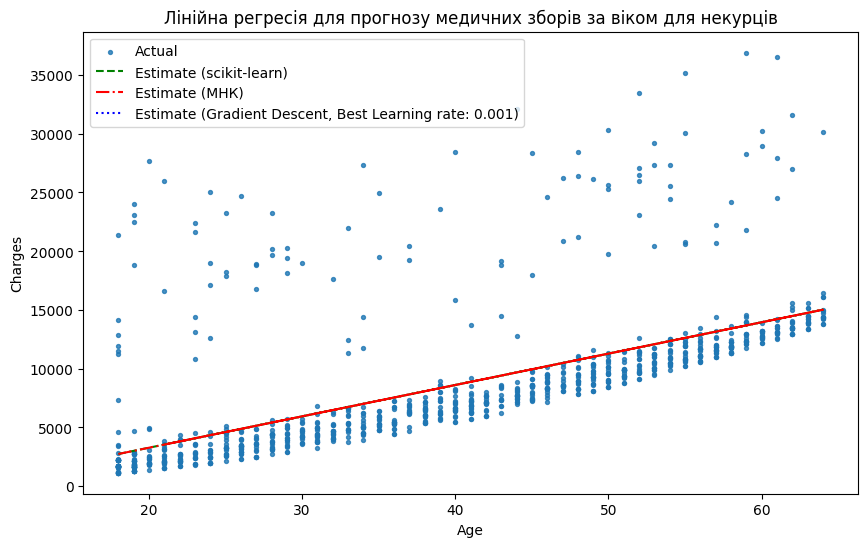

In [54]:
from sklearn.linear_model import LinearRegression

X = non_smoker_df['age'].to_frame()

# scikit-learn
model_sklearn = LinearRegression()
model_sklearn.fit(X, charges)
predictions_sklearn = model_sklearn.predict(X)

# МНК (без scikit-learn)
X_ones = np.column_stack((np.ones_like(ages), ages))
theta_mnk = np.linalg.pinv(X_ones).dot(charges)
predictions_mnk = X_ones.dot(theta_mnk)

# (без scikit-learn)
learning_rate = 0.001  # Лучший learning rate
epochs = 1000

def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred)**2))

def gradient_descent(X, y, lr, epochs):
    theta = np.zeros(X.shape[1])
    for _ in range(epochs):
        gradients = (2 / len(X)) * X.T.dot(X.dot(theta) - y)
        theta -= lr * gradients
    return theta

theta_gd = gradient_descent(X_ones, charges, learning_rate, epochs)
predictions_gd = X_ones.dot(theta_gd)

plt.figure(figsize=(10, 6))
plt.scatter(ages, charges, s=8, alpha=0.8, label='Actual')

plt.plot(ages, predictions_sklearn, 'g--', label='Estimate (scikit-learn)')
plt.plot(ages, predictions_mnk, 'r-.', label='Estimate (МНК)')
plt.plot(ages, predictions_gd, 'b:', label=f'Estimate (Gradient Descent, Best Learning rate: {learning_rate})')

plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.title('Лінійна регресія для прогнозу медичних зборів за віком для некурців')
plt.show()


Висновки:
всі три методи дають схожі результати та близькі лінії регресії,а вибір конкретної моделі буде залежати від особистих вподобань та швидкості моделі

 **Завдання 2.** Навчіть модель лінійної регресії з допомогою sklearn оцінювати розмір медичних збори для **курців** за їх віком.
Виведіть
- точність моделі
-  коефіцієнти
-  візуалізуйте модель у вигляді лінії на графіку розсіювання `age` проти `charges`

і зробіть висновки, чи це хороша модель, чи ви б її використовували в компанії?

Точність моделі (R-squared): 0.14
Коефіцієнт перетину (intercept): 20294.13
Коефіцієнт при віку (slope): 305.24


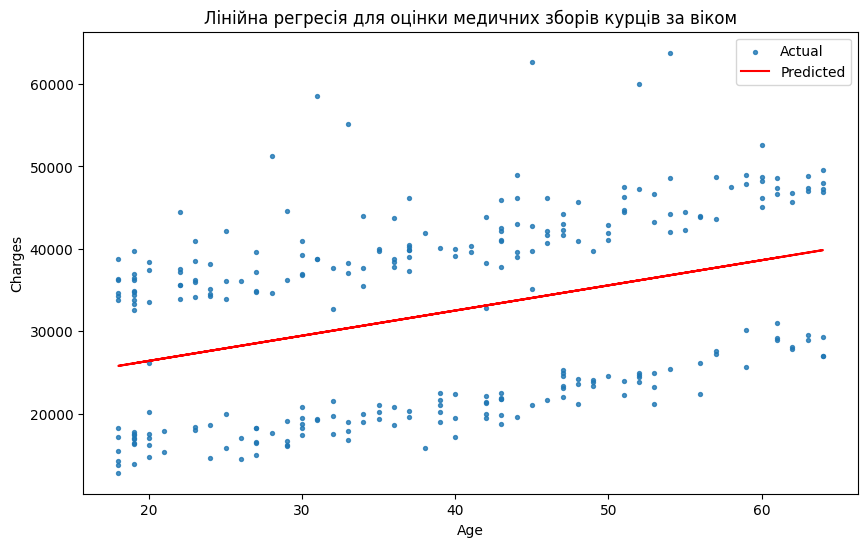

In [57]:
from sklearn.linear_model import LinearRegression

smoker_df = medical_df[medical_df.smoker == 'yes']

X = smoker_df['age'].values.reshape(-1, 1)
y = smoker_df['charges'].values

model = LinearRegression()
model.fit(X, y)

r2_score = model.score(X, y)
print(f"Точність моделі (R-squared): {r2_score:.2f}")

intercept = model.intercept_
coef = model.coef_[0]
print(f"Коефіцієнт перетину (intercept): {intercept:.2f}")
print(f"Коефіцієнт при віку (slope): {coef:.2f}")

plt.figure(figsize=(10, 6))
plt.scatter(X, y, s=8, alpha=0.8, label='Actual')
plt.plot(X, model.predict(X), 'r', label='Predicted')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.title('Лінійна регресія для оцінки медичних зборів курців за віком')
plt.show()

З графіку бачимо, що модель лінійної регресії не підходить, схоже, що значна частина даних відсутня для charges (20 000 -31 000), тож ця модель підійшла б окремо для даних поділених від 0 до 20 000, та від 31 000 до 65 000